# Ivan Orlovic and Shane Rodricks
## CS 615 Final Project Data Visualization

In [ ]:
# @title Imports
# Kmeans
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import silhouette_score

%matplotlib inline

#
# DBSCAN
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from PIL import Image

## hierarchical
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

# make sure you have these to make dendrograms!-------
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
#-----------------------------------------------------

%matplotlib inline

#PCA

from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # simple TT split cv
import numpy as np
import seaborn as sb

from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV # Linear Regression Model
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures #Z-score variables and POLYNOMIALFEATURES INCLUDED
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error, accuracy_score #model evaluation
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut

# performance
from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.calibration import calibration_curve

# model validation imports
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv

# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer


# Load data

In [ ]:
games = pd.read_csv('games.csv')

In [ ]:
games.head()

,ID,Competition_Name,Country,Season_End_Year,Round,Wk,Day,Date,Time,Home,...,bench_name_away7,bench_age_away7,bench_position_away7,bench_minutes_away7,bench_goals_away7,bench_name_away8,bench_age_away8,bench_position_away8,bench_minutes_away8,bench_goals_away8
0,1,Fußball-Bundesliga,GER,2015,Regular season,1.0,Fri,8/22/2014,20:30,Bayern Munich,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Fußball-Bundesliga,GER,2015,Regular season,1.0,Sat,8/23/2014,15:30,Eint Frankfurt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Fußball-Bundesliga,GER,2015,Regular season,1.0,Sat,8/23/2014,15:30,Hannover 96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Fußball-Bundesliga,GER,2015,Regular season,1.0,Sat,8/23/2014,15:30,Hertha BSC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Fußball-Bundesliga,GER,2015,Regular season,1.0,Sat,8/23/2014,15:30,Hoffenheim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
selectedFeatures = ['Competition_Name', 'Season_End_Year', 'Wk', 'Round', 'Home', 'Away', 'HomeGoals', 'AwayGoals', 'manager_home', 'manager_away', 'formation_home', 'formation_away', 'possessiontime_home', 'possessiontime_away', 'shots_total_home', 'shots_total_away', 'yellow_cards_home', 'red_cards_home', 'yellow_cards_away', 'red_cards_away', ]

In [ ]:
games_selected = games[selectedFeatures]

In [ ]:
games_selected.head()

,Competition_Name,Season_End_Year,Wk,Round,Home,Away,HomeGoals,AwayGoals,manager_home,manager_away,formation_home,formation_away,possessiontime_home,possessiontime_away,shots_total_home,shots_total_away,yellow_cards_home,red_cards_home,yellow_cards_away,red_cards_away
0,Fußball-Bundesliga,2015,1.0,Regular season,Bayern Munich,Wolfsburg,2,1,Pep Guardiola,Dieter Hecking,3-4-1-2,4-2-3-1,0.60,0.40,17.0,7.0,0.0,0.0,2.0,0.0
1,Fußball-Bundesliga,2015,1.0,Regular season,Eint Frankfurt,Freiburg,1,0,Thomas Schaaf,Christian Streich,4-2-3-1,4-4-2,0.36,0.64,9.0,13.0,1.0,0.0,3.0,0.0
2,Fußball-Bundesliga,2015,1.0,Regular season,Hannover 96,Schalke 04,2,1,Tayfun Korkut,Jens Keller,4-4-2,4-2-3-1,0.44,0.56,7.0,12.0,2.0,0.0,1.0,0.0
3,Fußball-Bundesliga,2015,1.0,Regular season,Hertha BSC,Werder Bremen,2,2,Jos Luhukay,Robin Dutt,4-2-3-1,4-1-2-1-2,0.54,0.46,19.0,9.0,1.0,0.0,2.0,0.0
4,Fußball-Bundesliga,2015,1.0,Regular season,Hoffenheim,Augsburg,2,0,Markus Gisdol,Markus Weinzierl,4-2-3-1,4-2-3-1,0.43,0.57,11.0,12.0,2.0,0.0,3.0,0.0


In [ ]:
games_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27846 entries, 0 to 27845
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Competition_Name     27846 non-null  object 
 1   Season_End_Year      27846 non-null  int64  
 2   Wk                   23190 non-null  float64
 3   Round                27846 non-null  object 
 4   Home                 27846 non-null  object 
 5   Away                 27846 non-null  object 
 6   HomeGoals            27846 non-null  int64  
 7   AwayGoals            27846 non-null  int64  
 8   manager_home         27846 non-null  object 
 9   manager_away         27846 non-null  object 
 10  formation_home       26786 non-null  object 
 11  formation_away       26785 non-null  object 
 12  possessiontime_home  26566 non-null  float64
 13  possessiontime_away  26566 non-null  float64
 14  shots_total_home     25542 non-null  float64
 15  shots_total_away     25542 non-null 

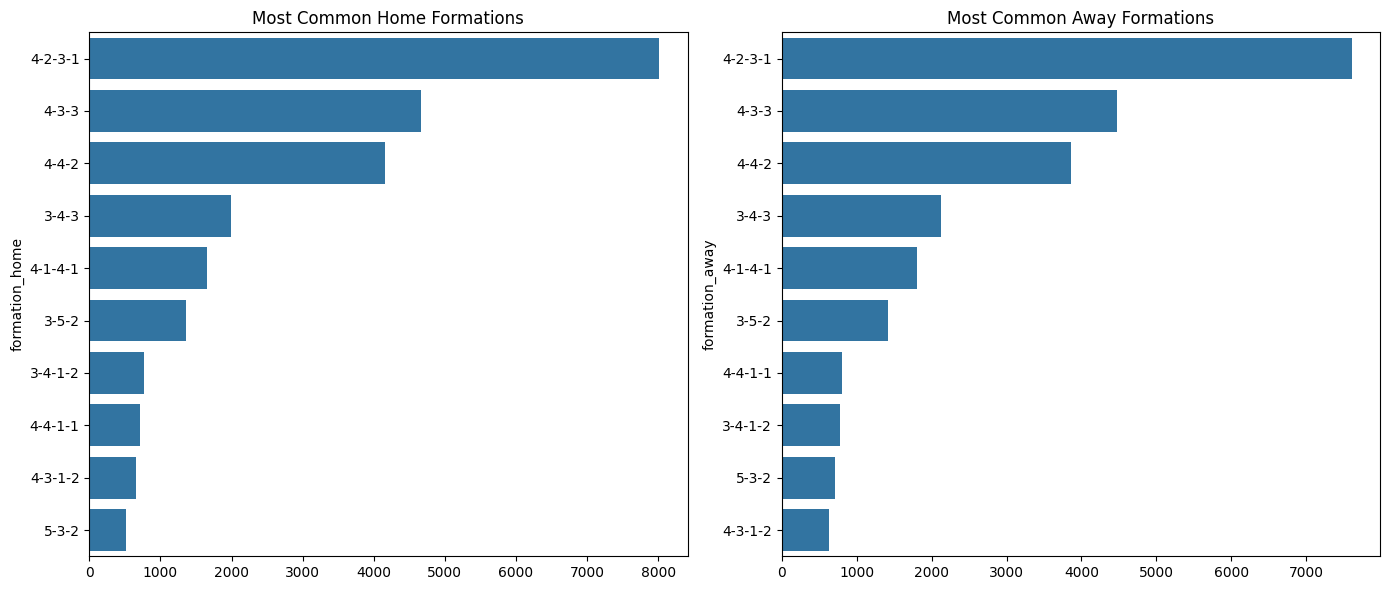

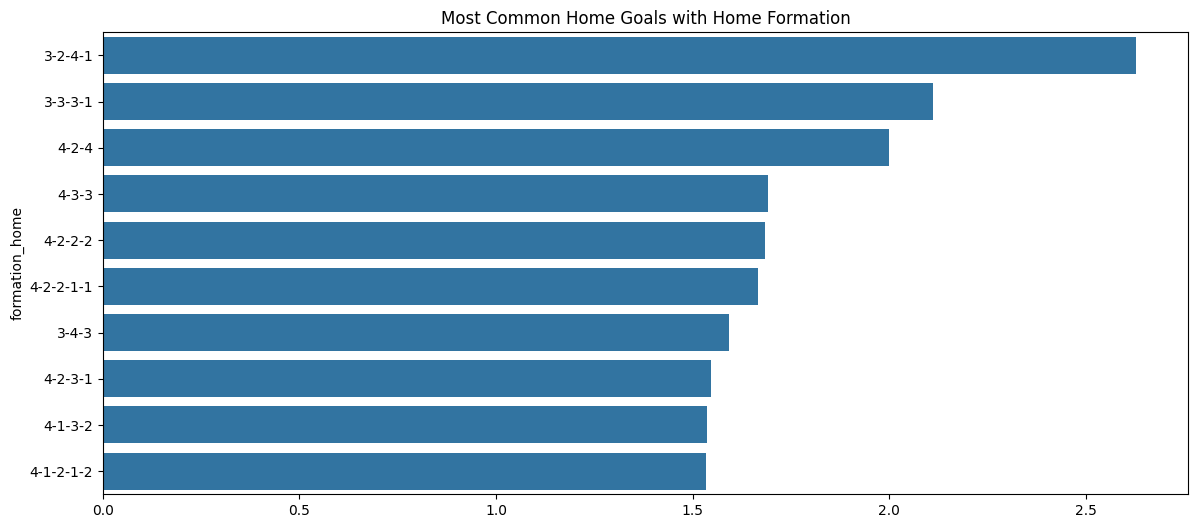

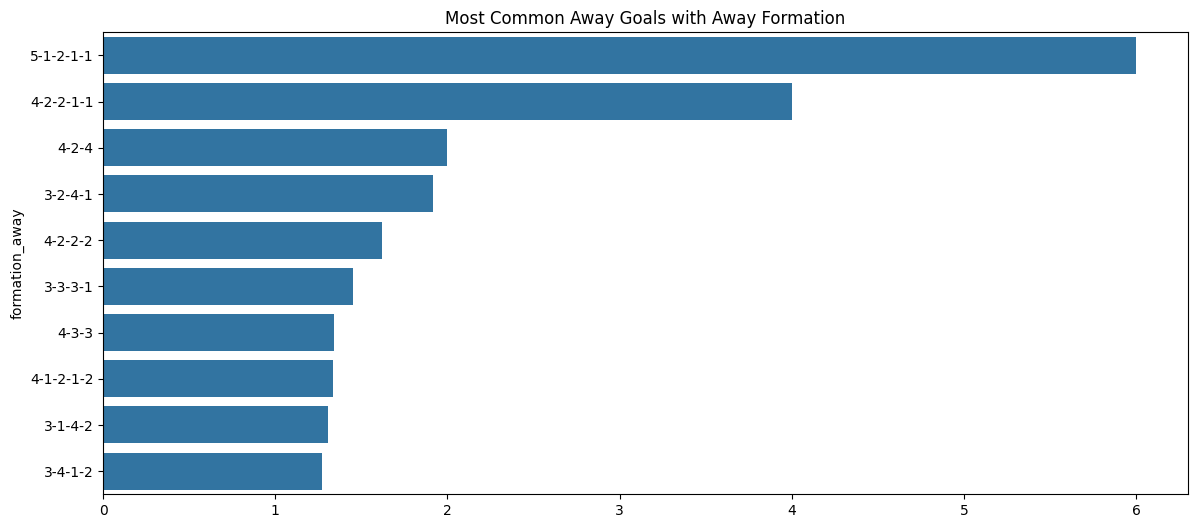

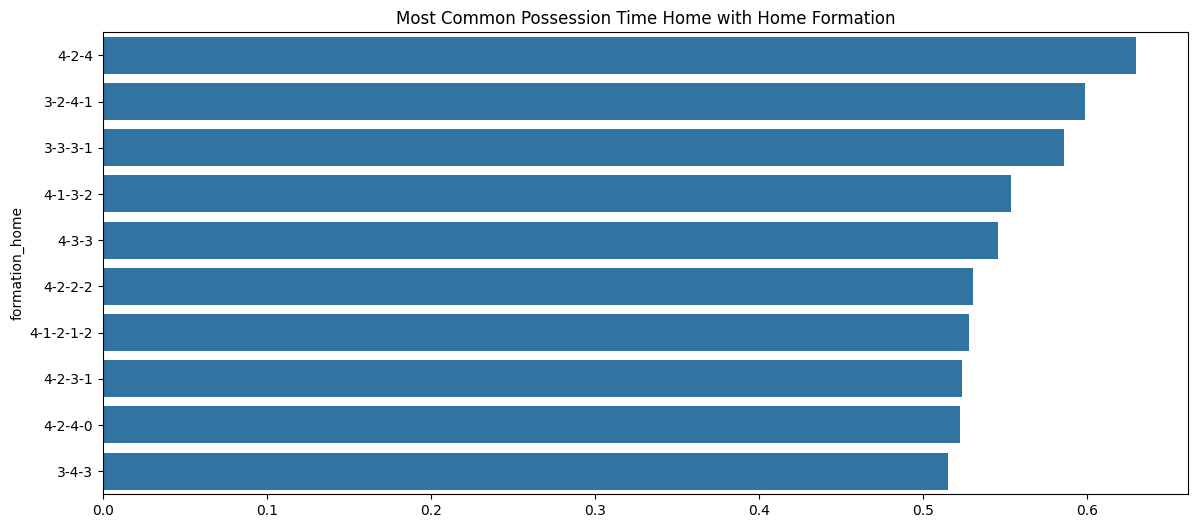

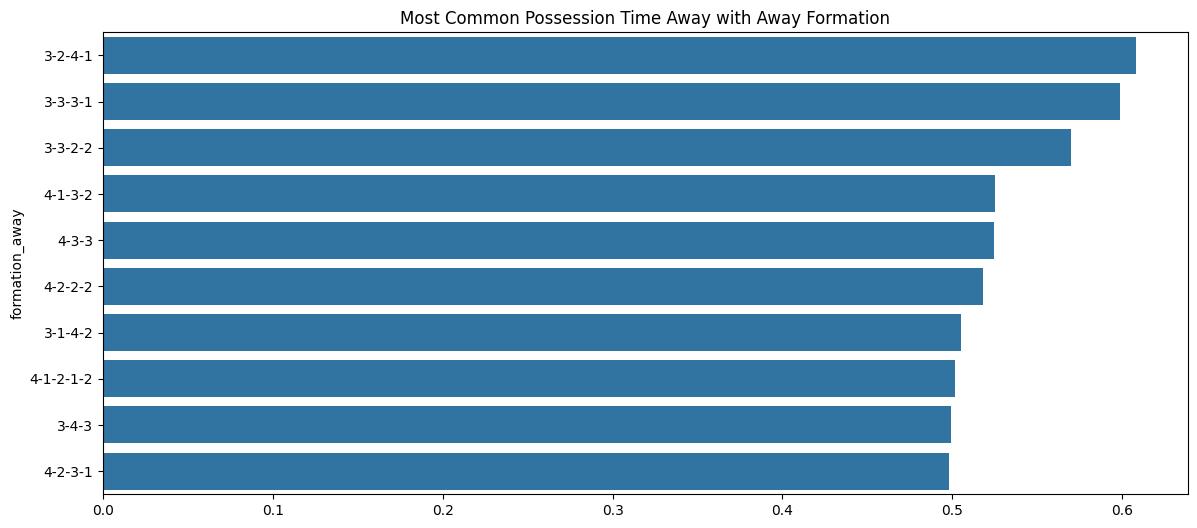

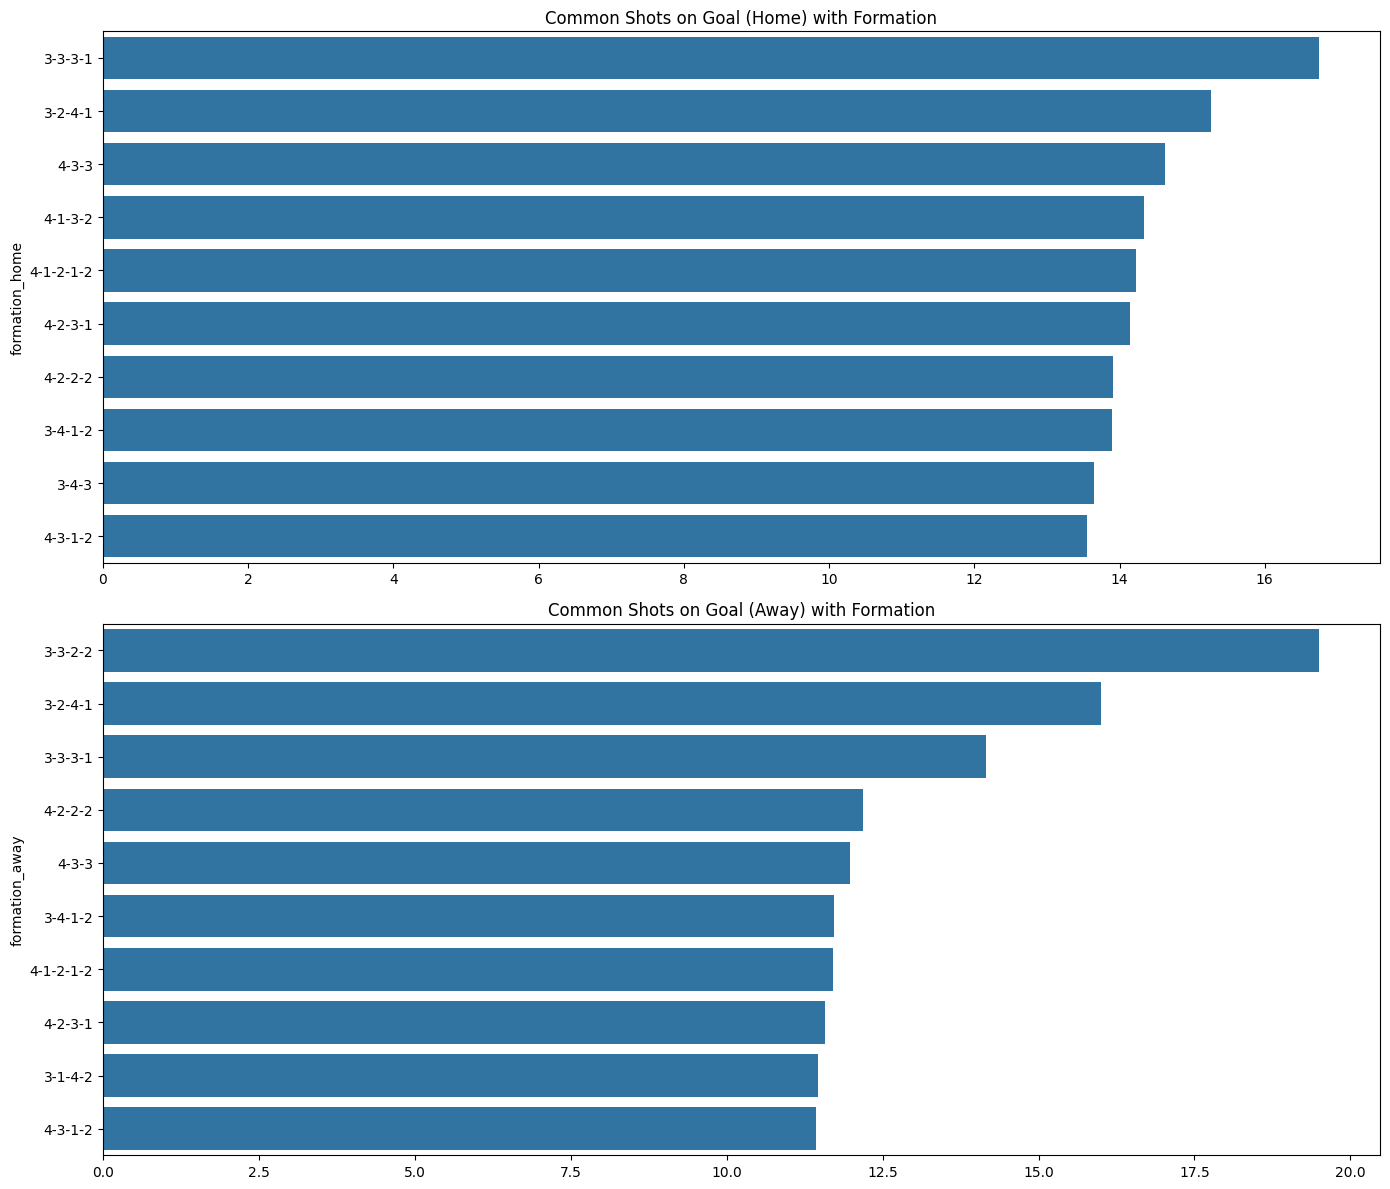

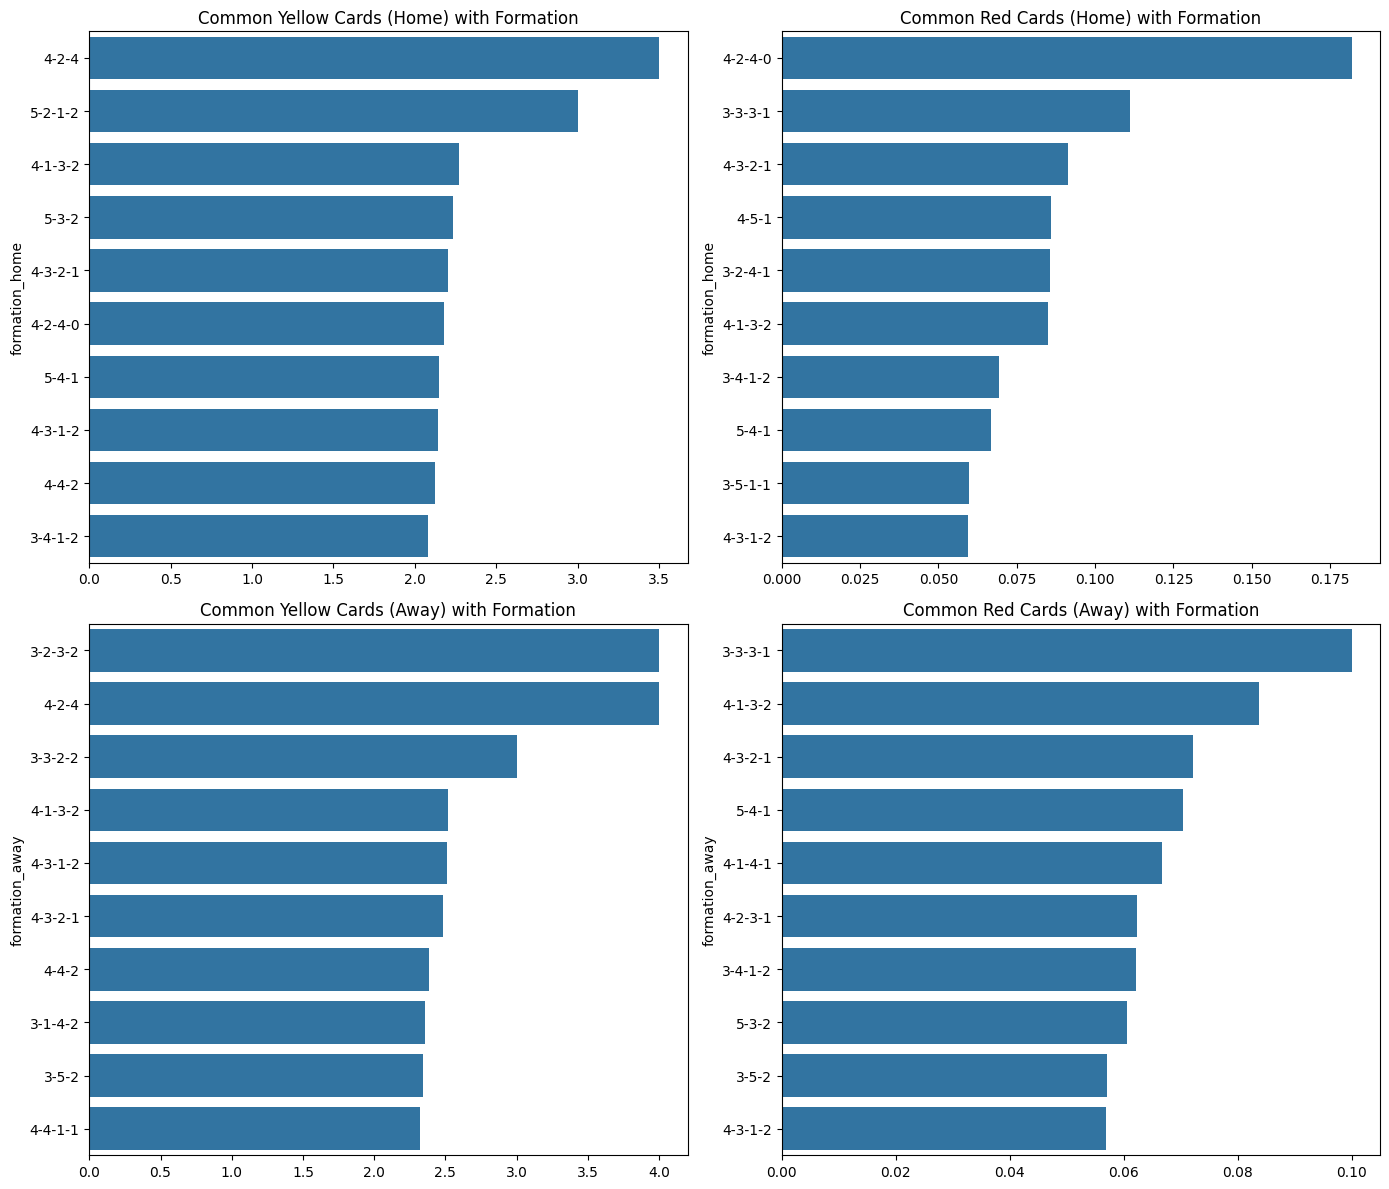

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Most common home and away formations
home_formations = games['formation_home'].value_counts().head(10)
away_formations = games['formation_away'].value_counts().head(10)

# Plot the most common formations
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=home_formations.values, y=home_formations.index)
plt.title('Most Common Home Formations')
plt.subplot(1, 2, 2)
sns.barplot(x=away_formations.values, y=away_formations.index)
plt.title('Most Common Away Formations')
plt.tight_layout()
plt.show()

# Most common home goals with home formation
home_goals_formation = games.groupby('formation_home')['HomeGoals'].mean().sort_values(ascending=False).head(10)

# Plot the most common home goals with home formation
plt.figure(figsize=(14, 6))
sns.barplot(x=home_goals_formation.values, y=home_goals_formation.index)
plt.title('Most Common Home Goals with Home Formation')
plt.show()

# Most common away goals with away formation
away_goals_formation = games.groupby('formation_away')['AwayGoals'].mean().sort_values(ascending=False).head(10)

# Plot the most common away goals with away formation
plt.figure(figsize=(14, 6))
sns.barplot(x=away_goals_formation.values, y=away_goals_formation.index)
plt.title('Most Common Away Goals with Away Formation')
plt.show()

# Most common possession time home with home formation
possession_home_formation = games.groupby('formation_home')['possessiontime_home'].mean().sort_values(ascending=False).head(10)

# Plot the most common possession time home with home formation
plt.figure(figsize=(14, 6))
sns.barplot(x=possession_home_formation.values, y=possession_home_formation.index)
plt.title('Most Common Possession Time Home with Home Formation')
plt.show()

# Most common possession time away with away formation
possession_away_formation = games.groupby('formation_away')['possessiontime_away'].mean().sort_values(ascending=False).head(10)

# Plot the most common possession time away with away formation
plt.figure(figsize=(14, 6))
sns.barplot(x=possession_away_formation.values, y=possession_away_formation.index)
plt.title('Most Common Possession Time Away with Away Formation')
plt.show()

# Common shots on goal with formation
shots_home_formation = games.groupby('formation_home')['shots_total_home'].mean().sort_values(ascending=False).head(10)
shots_away_formation = games.groupby('formation_away')['shots_total_away'].mean().sort_values(ascending=False).head(10)

# Plot the common shots on goal with formation
plt.figure(figsize=(14, 12))
plt.subplot(2, 1, 1)
sns.barplot(x=shots_home_formation.values, y=shots_home_formation.index)
plt.title('Common Shots on Goal (Home) with Formation')
plt.subplot(2, 1, 2)
sns.barplot(x=shots_away_formation.values, y=shots_away_formation.index)
plt.title('Common Shots on Goal (Away) with Formation')
plt.tight_layout()
plt.show()

# Common yellow cards and red cards with formation
yellow_cards_home_formation = games.groupby('formation_home')['yellow_cards_home'].mean().sort_values(ascending=False).head(10)
red_cards_home_formation = games.groupby('formation_home')['red_cards_home'].mean().sort_values(ascending=False).head(10)

yellow_cards_away_formation = games.groupby('formation_away')['yellow_cards_away'].mean().sort_values(ascending=False).head(10)
red_cards_away_formation = games.groupby('formation_away')['red_cards_away'].mean().sort_values(ascending=False).head(10)

# Plot the common yellow and red cards with formation
plt.figure(figsize=(14, 12))
plt.subplot(2, 2, 1)
sns.barplot(x=yellow_cards_home_formation.values, y=yellow_cards_home_formation.index)
plt.title('Common Yellow Cards (Home) with Formation')
plt.subplot(2, 2, 2)
sns.barplot(x=red_cards_home_formation.values, y=red_cards_home_formation.index)
plt.title('Common Red Cards (Home) with Formation')
plt.subplot(2, 2, 3)
sns.barplot(x=yellow_cards_away_formation.values, y=yellow_cards_away_formation.index)
plt.title('Common Yellow Cards (Away) with Formation')
plt.subplot(2, 2, 4)
sns.barplot(x=red_cards_away_formation.values, y=red_cards_away_formation.index)
plt.title('Common Red Cards (Away) with Formation')
plt.tight_layout()
plt.show()


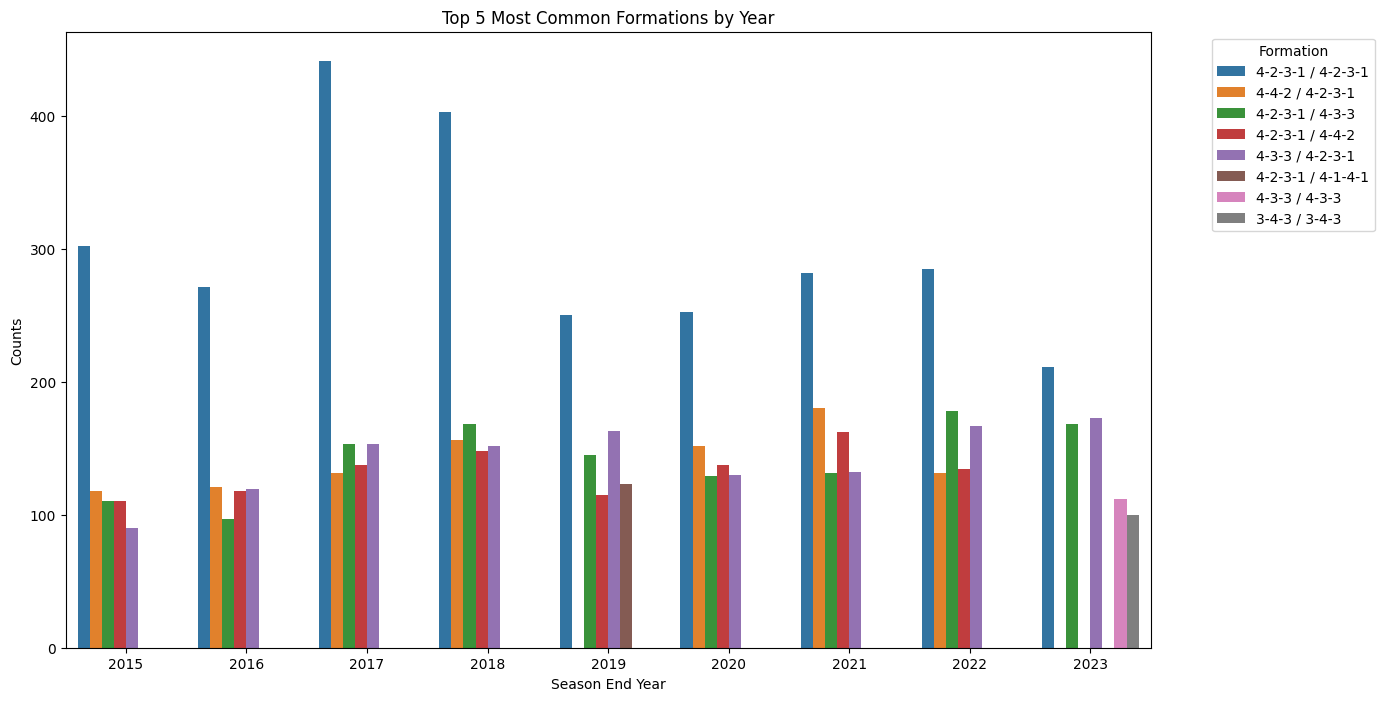

In [ ]:
# Most common formations by year, top 5
formation_year = games.groupby(['Season_End_Year', 'combined_formation']).size().reset_index(name='counts')
top5_formations_year = formation_year.groupby('Season_End_Year').apply(lambda x: x.nlargest(5, 'counts')).reset_index(drop=True)

# Plot the most common formations by year
plt.figure(figsize=(14, 8))
sns.barplot(data=top5_formations_year, x='Season_End_Year', y='counts', hue='combined_formation')
plt.title('Top 5 Most Common Formations by Year')
plt.xlabel('Season End Year')
plt.ylabel('Counts')
plt.legend(title='Formation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


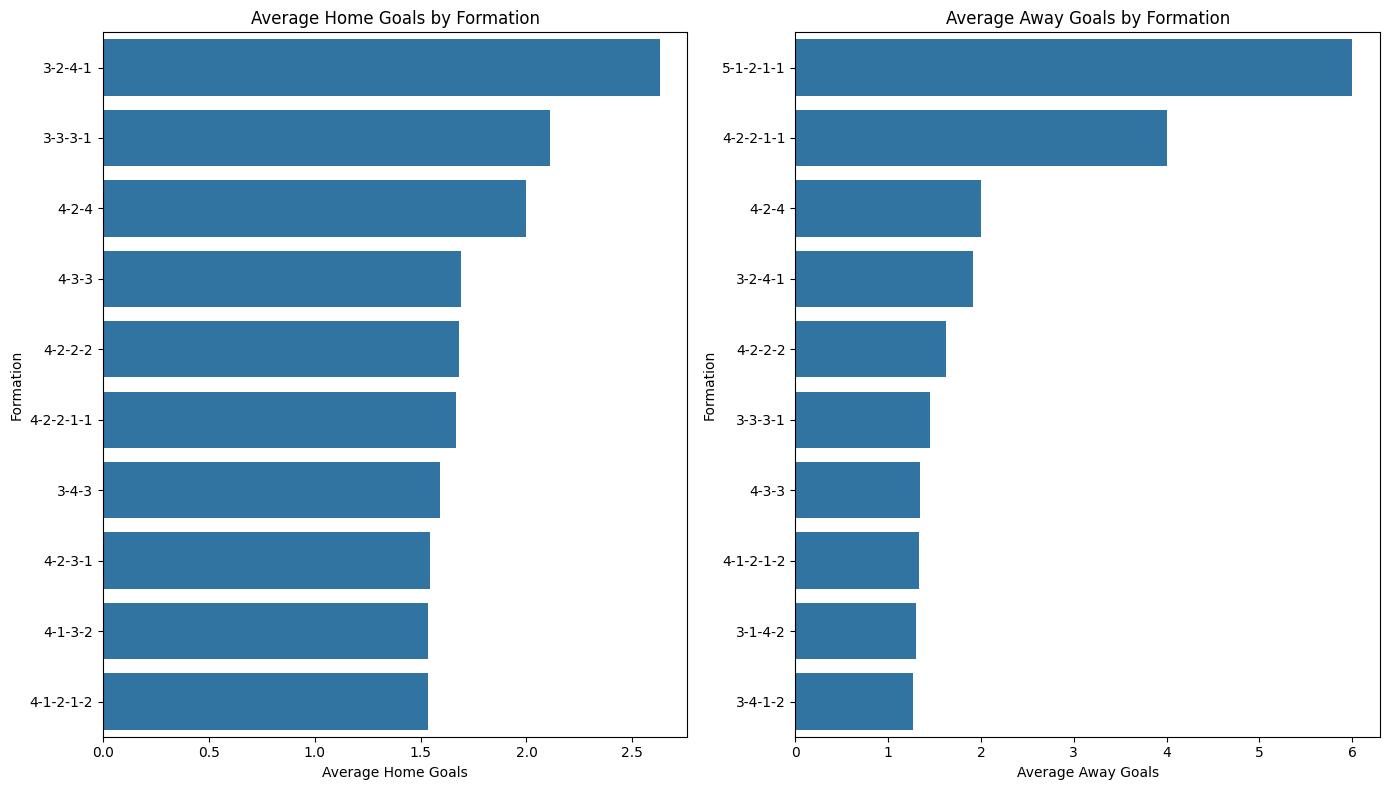

In [ ]:
# Average goals scored by formation
avg_home_goals_formation = games.groupby('formation_home')['HomeGoals'].mean().reset_index().rename(columns={'HomeGoals': 'avg_home_goals'})
avg_away_goals_formation = games.groupby('formation_away')['AwayGoals'].mean().reset_index().rename(columns={'AwayGoals': 'avg_away_goals'})

# Plot
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.barplot(x='avg_home_goals', y='formation_home', data=avg_home_goals_formation.sort_values(by='avg_home_goals', ascending=False).head(10))
plt.title('Average Home Goals by Formation')
plt.xlabel('Average Home Goals')
plt.ylabel('Formation')

plt.subplot(1, 2, 2)
sns.barplot(x='avg_away_goals', y='formation_away', data=avg_away_goals_formation.sort_values(by='avg_away_goals', ascending=False).head(10))
plt.title('Average Away Goals by Formation')
plt.xlabel('Average Away Goals')
plt.ylabel('Formation')

plt.tight_layout()
plt.show()


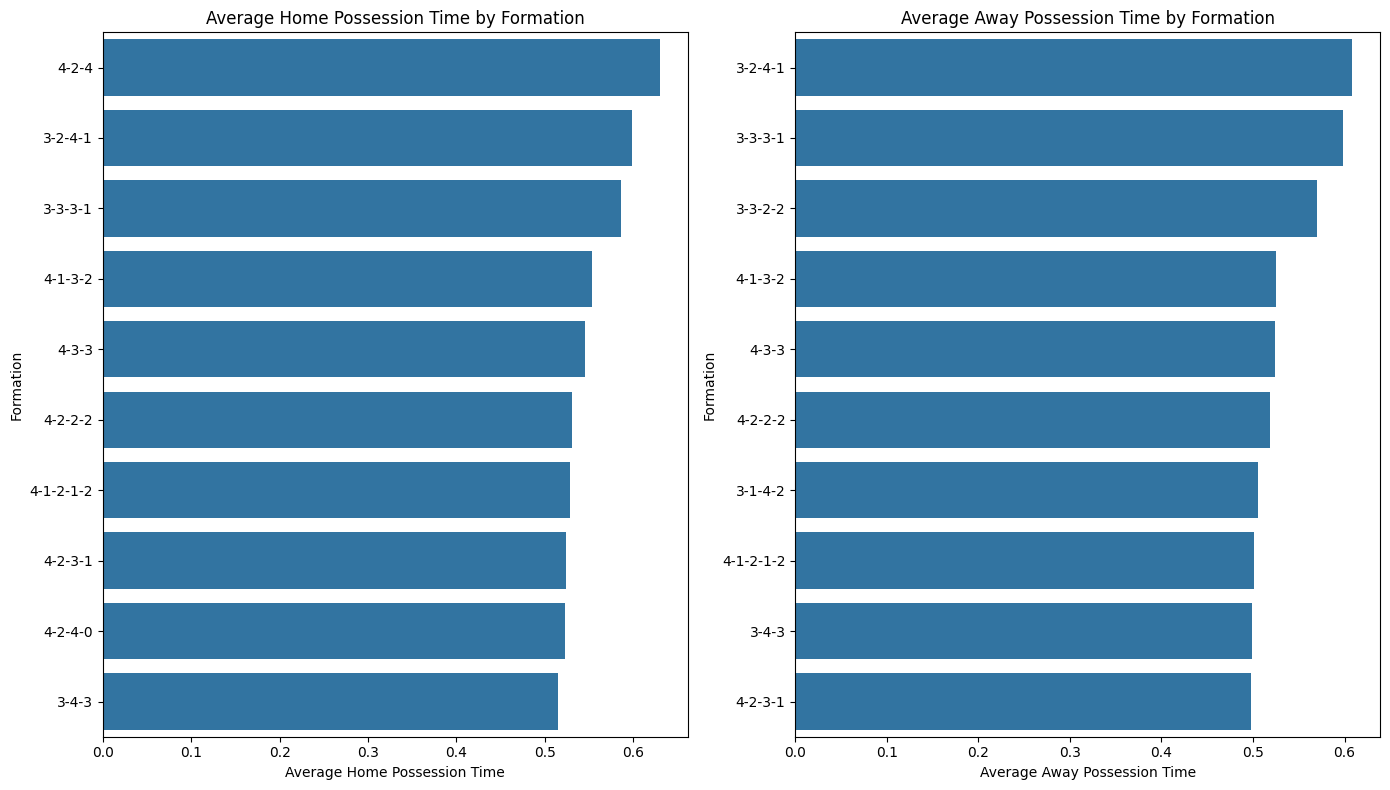

In [ ]:
# Average possession time by formation
avg_possession_home_formation = games.groupby('formation_home')['possessiontime_home'].mean().reset_index().rename(columns={'possessiontime_home': 'avg_possession_home'})
avg_possession_away_formation = games.groupby('formation_away')['possessiontime_away'].mean().reset_index().rename(columns={'possessiontime_away': 'avg_possession_away'})

# Plot
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.barplot(x='avg_possession_home', y='formation_home', data=avg_possession_home_formation.sort_values(by='avg_possession_home', ascending=False).head(10))
plt.title('Average Home Possession Time by Formation')
plt.xlabel('Average Home Possession Time')
plt.ylabel('Formation')

plt.subplot(1, 2, 2)
sns.barplot(x='avg_possession_away', y='formation_away', data=avg_possession_away_formation.sort_values(by='avg_possession_away', ascending=False).head(10))
plt.title('Average Away Possession Time by Formation')
plt.xlabel('Average Away Possession Time')
plt.ylabel('Formation')

plt.tight_layout()
plt.show()


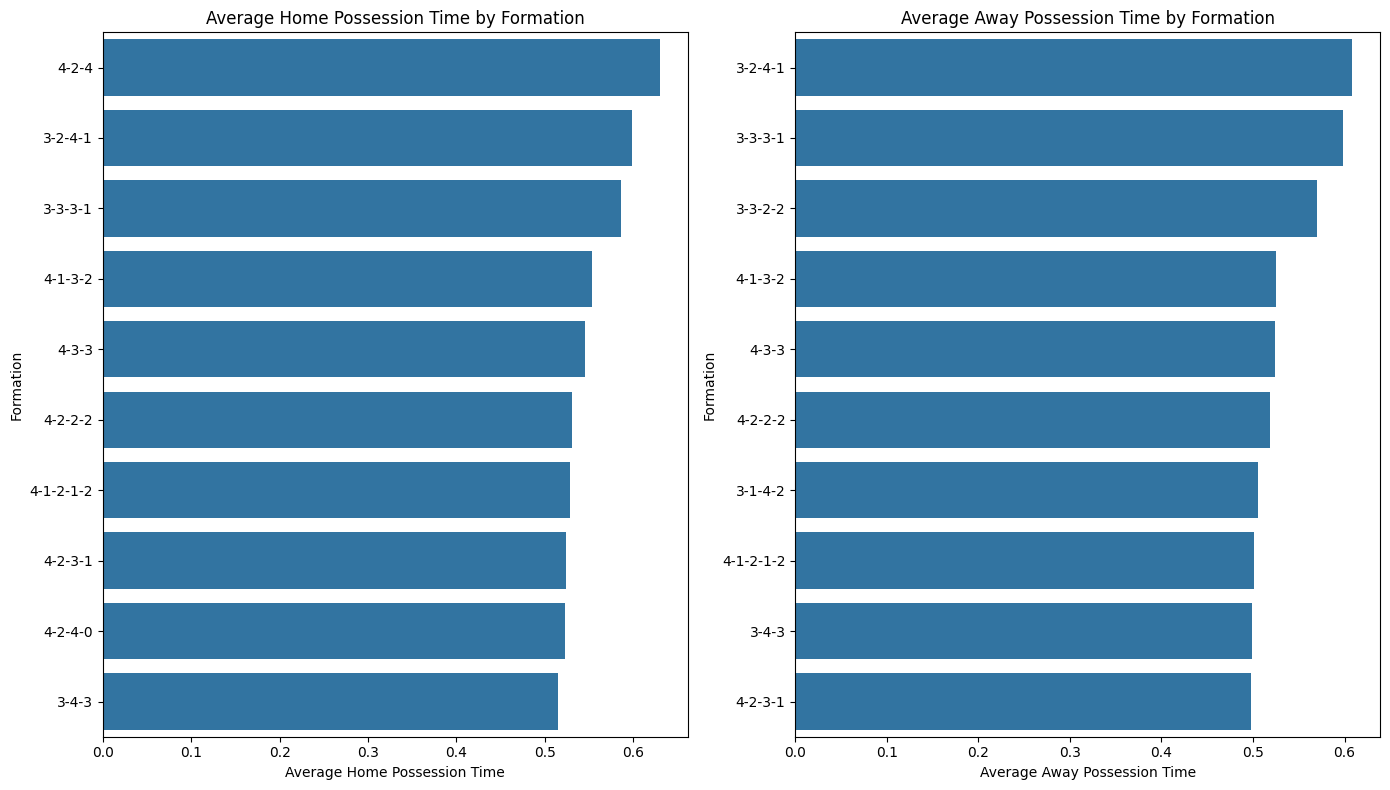

In [ ]:
# Average possession time by formation
avg_possession_home_formation = games.groupby('formation_home')['possessiontime_home'].mean().reset_index().rename(columns={'possessiontime_home': 'avg_possession_home'})
avg_possession_away_formation = games.groupby('formation_away')['possessiontime_away'].mean().reset_index().rename(columns={'possessiontime_away': 'avg_possession_away'})

# Plot
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.barplot(x='avg_possession_home', y='formation_home', data=avg_possession_home_formation.sort_values(by='avg_possession_home', ascending=False).head(10))
plt.title('Average Home Possession Time by Formation')
plt.xlabel('Average Home Possession Time')
plt.ylabel('Formation')

plt.subplot(1, 2, 2)
sns.barplot(x='avg_possession_away', y='formation_away', data=avg_possession_away_formation.sort_values(by='avg_possession_away', ascending=False).head(10))
plt.title('Average Away Possession Time by Formation')
plt.xlabel('Average Away Possession Time')
plt.ylabel('Formation')

plt.tight_layout()
plt.show()


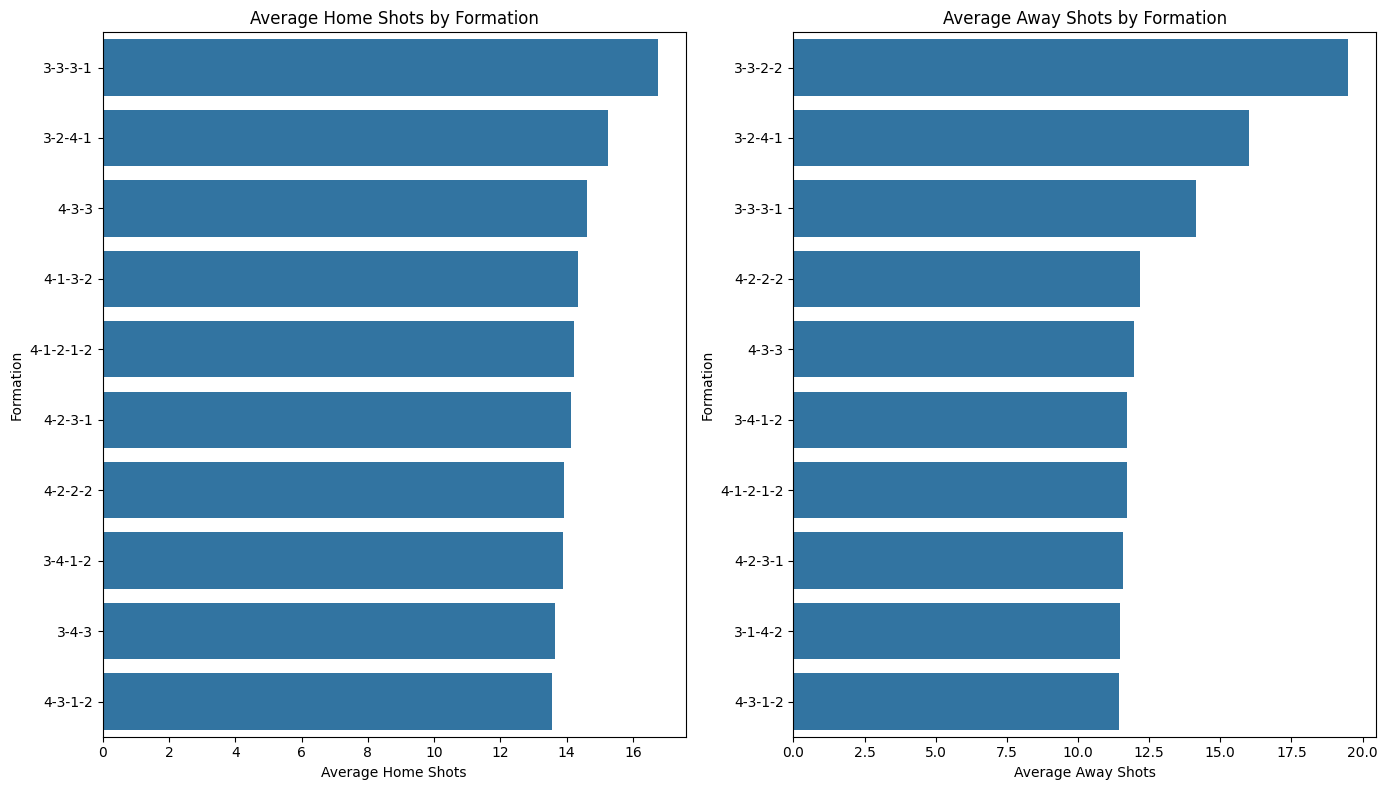

In [ ]:
# Average shots by formation
avg_shots_home_formation = games.groupby('formation_home')['shots_total_home'].mean().reset_index().rename(columns={'shots_total_home': 'avg_shots_home'})
avg_shots_away_formation = games.groupby('formation_away')['shots_total_away'].mean().reset_index().rename(columns={'shots_total_away': 'avg_shots_away'})

# Plot
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.barplot(x='avg_shots_home', y='formation_home', data=avg_shots_home_formation.sort_values(by='avg_shots_home', ascending=False).head(10))
plt.title('Average Home Shots by Formation')
plt.xlabel('Average Home Shots')
plt.ylabel('Formation')

plt.subplot(1, 2, 2)
sns.barplot(x='avg_shots_away', y='formation_away', data=avg_shots_away_formation.sort_values(by='avg_shots_away', ascending=False).head(10))
plt.title('Average Away Shots by Formation')
plt.xlabel('Average Away Shots')
plt.ylabel('Formation')

plt.tight_layout()
plt.show()


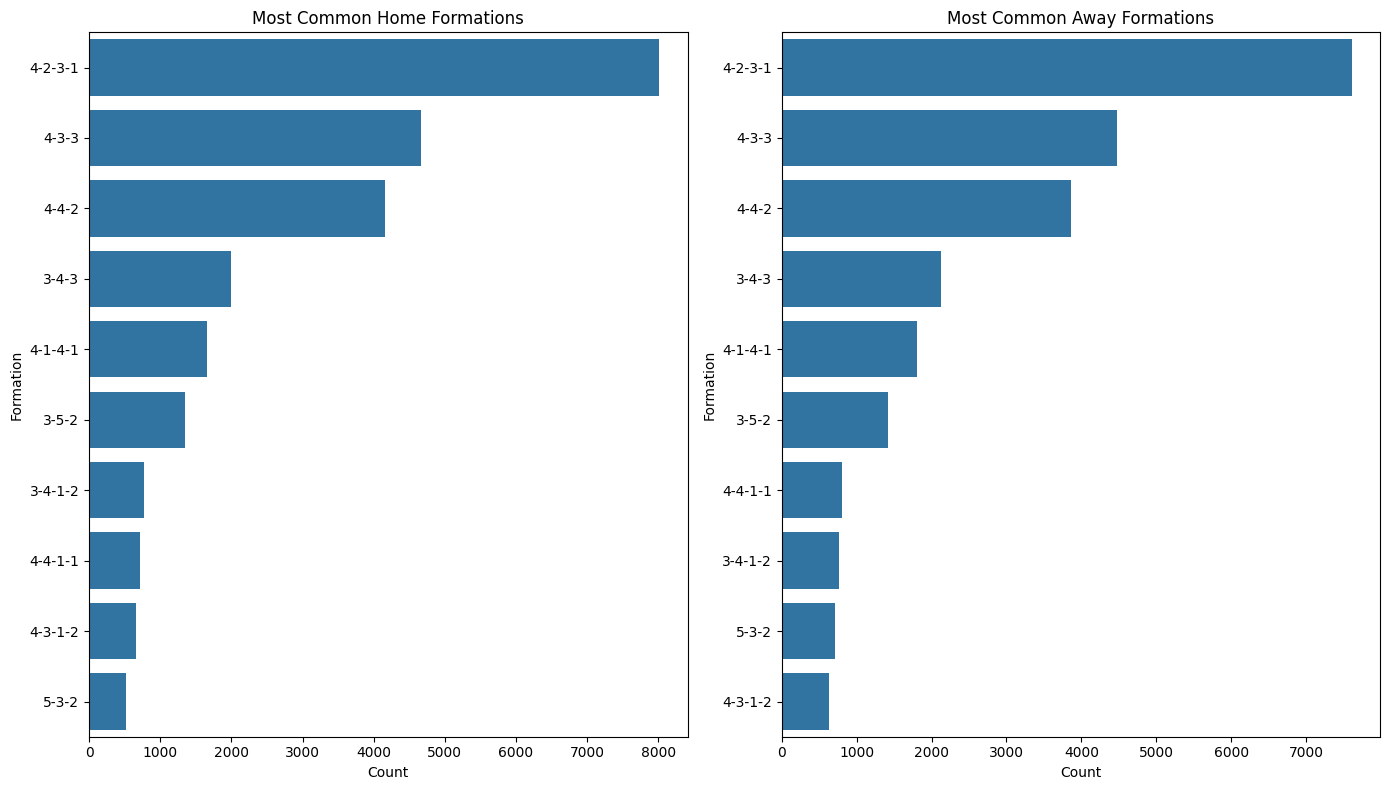

In [ ]:
# Most common formations
common_home_formations = games['formation_home'].value_counts().head(10)
common_away_formations = games['formation_away'].value_counts().head(10)

# Plot
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.barplot(x=common_home_formations.values, y=common_home_formations.index)
plt.title('Most Common Home Formations')
plt.xlabel('Count')
plt.ylabel('Formation')

plt.subplot(1, 2, 2)
sns.barplot(x=common_away_formations.values, y=common_away_formations.index)
plt.title('Most Common Away Formations')
plt.xlabel('Count')
plt.ylabel('Formation')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate total goals for each game
games['total_goals'] = games['HomeGoals'] + games['AwayGoals']

# Identify the top 10 highest scoring games
highest_scoring_games = games.sort_values(by='total_goals', ascending=False).head(10)

# Extract relevant columns for highest scoring games
highest_scoring_games_formations = highest_scoring_games[['Home', 'Away', 'HomeGoals', 'AwayGoals', 'total_goals', 'formation_home', 'formation_away']]
print(highest_scoring_games_formations)


                       Home             Away  HomeGoals  AwayGoals  \
18505              Dortmund  Legia Warsaw pl          8          4   
2902            Real Madrid   Rayo Vallecano         10          2   
13106               Hastedt       M'Gladbach          1         11   
13323             Bremer SV    Bayern Munich          0         12   
22776  Oriente Petrolero bo       Fluminense          1         10   
12128               Udinese          Perugia          8          3   
13684             Liverpool          Arsenal          5          5   
13095            BFC Dynamo             Köln          1          9   
12824         Chemnitzer FC         Mainz 05          5          5   
4195              Barcelona           Huesca          8          2   

       total_goals formation_home formation_away  
18505           12        4-2-3-1        4-2-3-1  
2902            12          4-3-3        4-2-3-1  
13106           12          5-4-1        4-3-2-1  
13323           12       

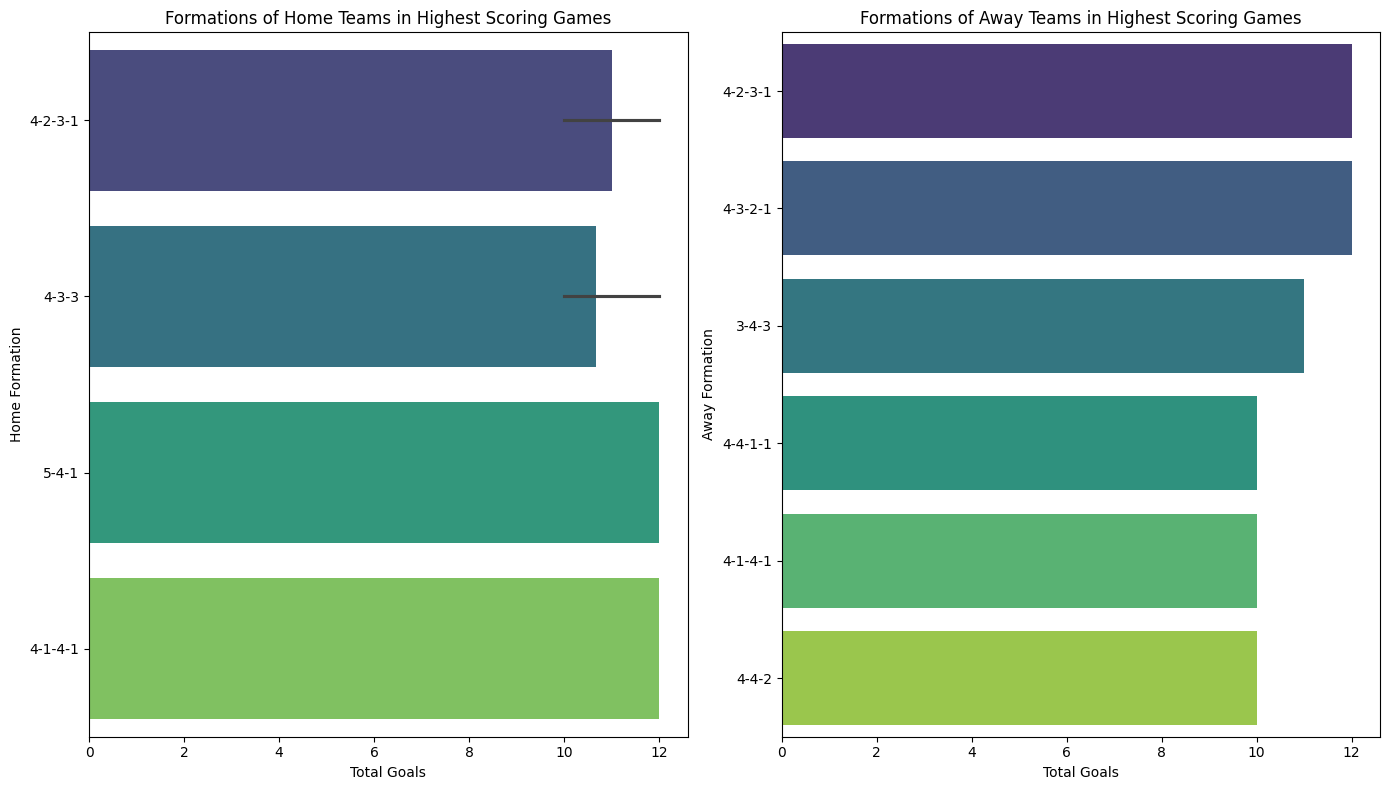

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the formations for highest scoring games
plt.figure(figsize=(14, 8))

# Plot for Home Formations
plt.subplot(1, 2, 1)
sns.barplot(x='total_goals', y='formation_home', data=highest_scoring_games_formations, palette='viridis')
plt.title('Formations of Home Teams in Highest Scoring Games')
plt.xlabel('Total Goals')
plt.ylabel('Home Formation')

# Plot for Away Formations
plt.subplot(1, 2, 2)
sns.barplot(x='total_goals', y='formation_away', data=highest_scoring_games_formations, palette='viridis')
plt.title('Formations of Away Teams in Highest Scoring Games')
plt.xlabel('Total Goals')
plt.ylabel('Away Formation')

plt.tight_layout()
plt.show()


In [ ]:
# Identify the most common home and away teams
common_teams_home = games['Home'].value_counts().head(10).index.tolist()
common_teams_away = games['Away'].value_counts().head(10).index.tolist()

# Combine the lists and remove duplicates to get 5 unique teams
common_teams = list(set(common_teams_home + common_teams_away))

common_teams


['Sevilla',
 'Atlético Madrid',
 'Manchester Utd',
 'Chelsea',
 'Real Madrid',
 'Juventus',
 'Liverpool',
 'Tottenham',
 'Barcelona',
 'Manchester City',
 'Arsenal']

In [ ]:
# Initialize an empty dictionary to store results
team_formations = {}

# Analyze top 5 formations for each common team
for team in common_teams:
    # Top 5 home formations
    home_formations = games[games['Home'] == team]['formation_home'].value_counts().head(5)

    # Top 5 away formations
    away_formations = games[games['Away'] == team]['formation_away'].value_counts().head(5)

    # Store the results in the dictionary
    team_formations[team] = {
        'home_formations': home_formations,
        'away_formations': away_formations
    }

team_formations


{'Sevilla': {'home_formations': formation_home
  4-2-3-1    100
  4-3-3       74
  3-4-3       14
  3-1-4-2     11
  4-4-2        9
  Name: count, dtype: int64,
  'away_formations': formation_away
  4-2-3-1    94
  4-3-3      72
  3-4-3      16
  3-5-2      10
  4-4-2       7
  Name: count, dtype: int64},
 'Atlético Madrid': {'home_formations': formation_home
  4-4-2      139
  3-1-4-2     17
  4-3-3       11
  5-3-2       11
  3-4-3        8
  Name: count, dtype: int64,
  'away_formations': formation_away
  4-4-2      139
  4-3-3       18
  3-1-4-2     15
  5-3-2       12
  4-2-3-1     10
  Name: count, dtype: int64},
 'Manchester Utd': {'home_formations': formation_home
  4-2-3-1      162
  4-3-3         29
  4-1-4-1       20
  3-4-1-2        9
  4-1-2-1-2      9
  Name: count, dtype: int64,
  'away_formations': formation_away
  4-2-3-1    133
  4-3-3       40
  3-4-1-2     15
  4-1-4-1     14
  3-4-3        7
  Name: count, dtype: int64},
 'Chelsea': {'home_formations': formation_ho

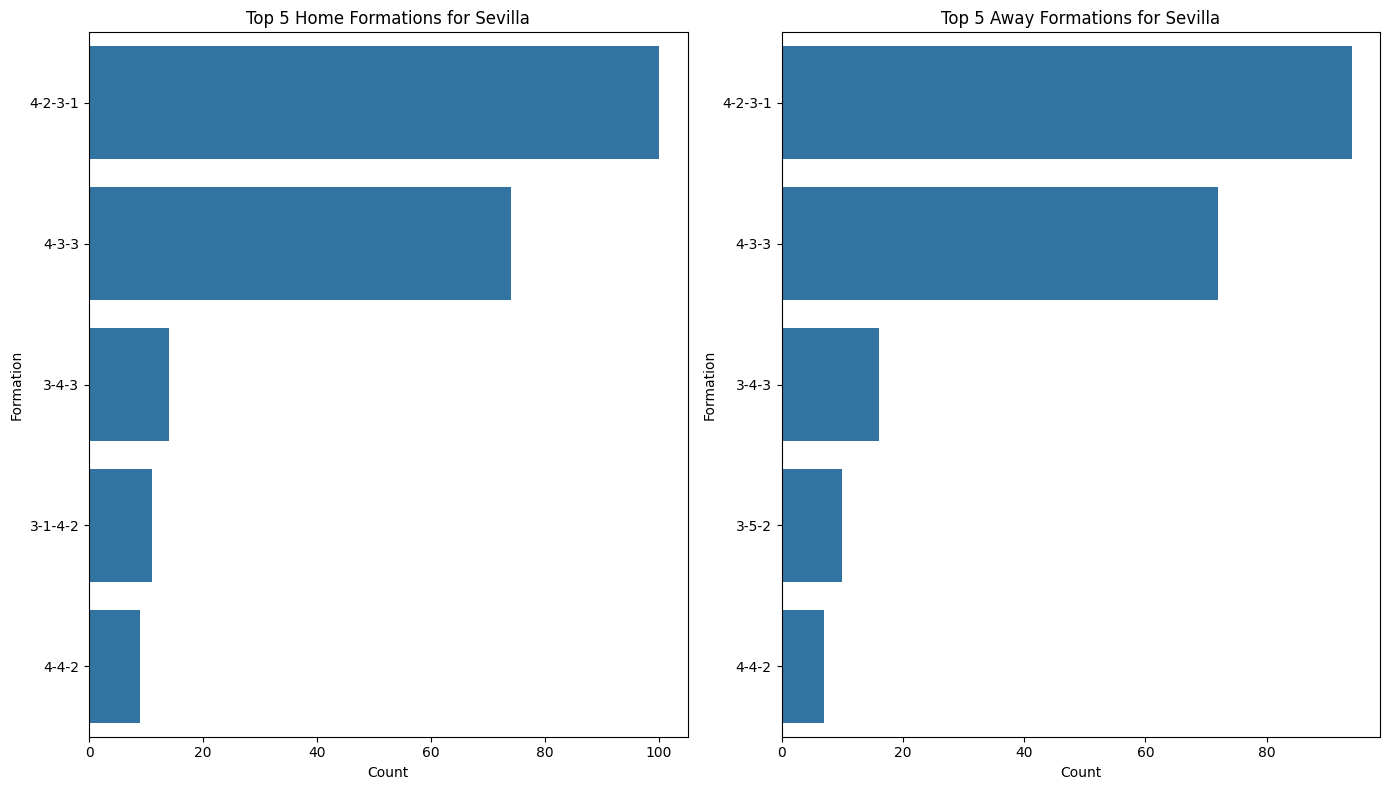

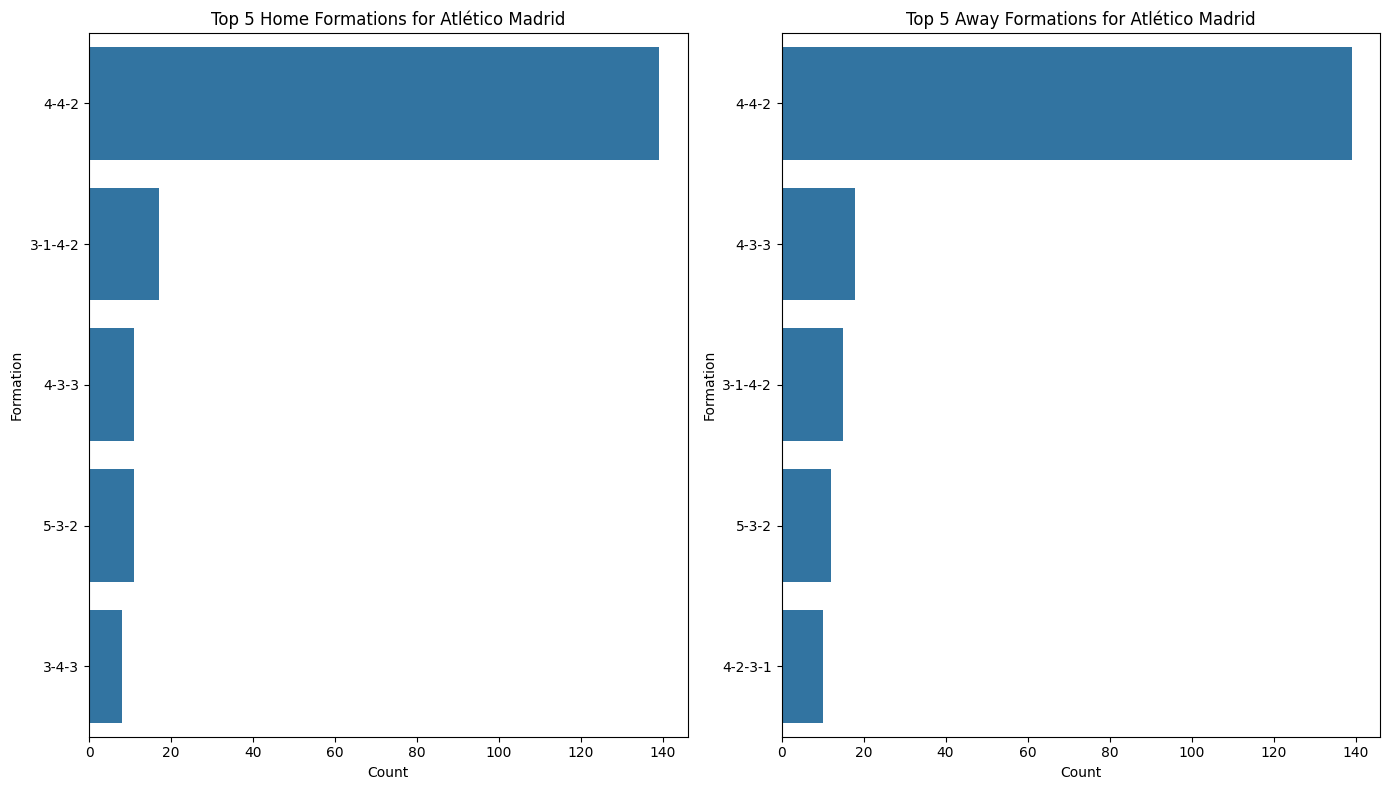

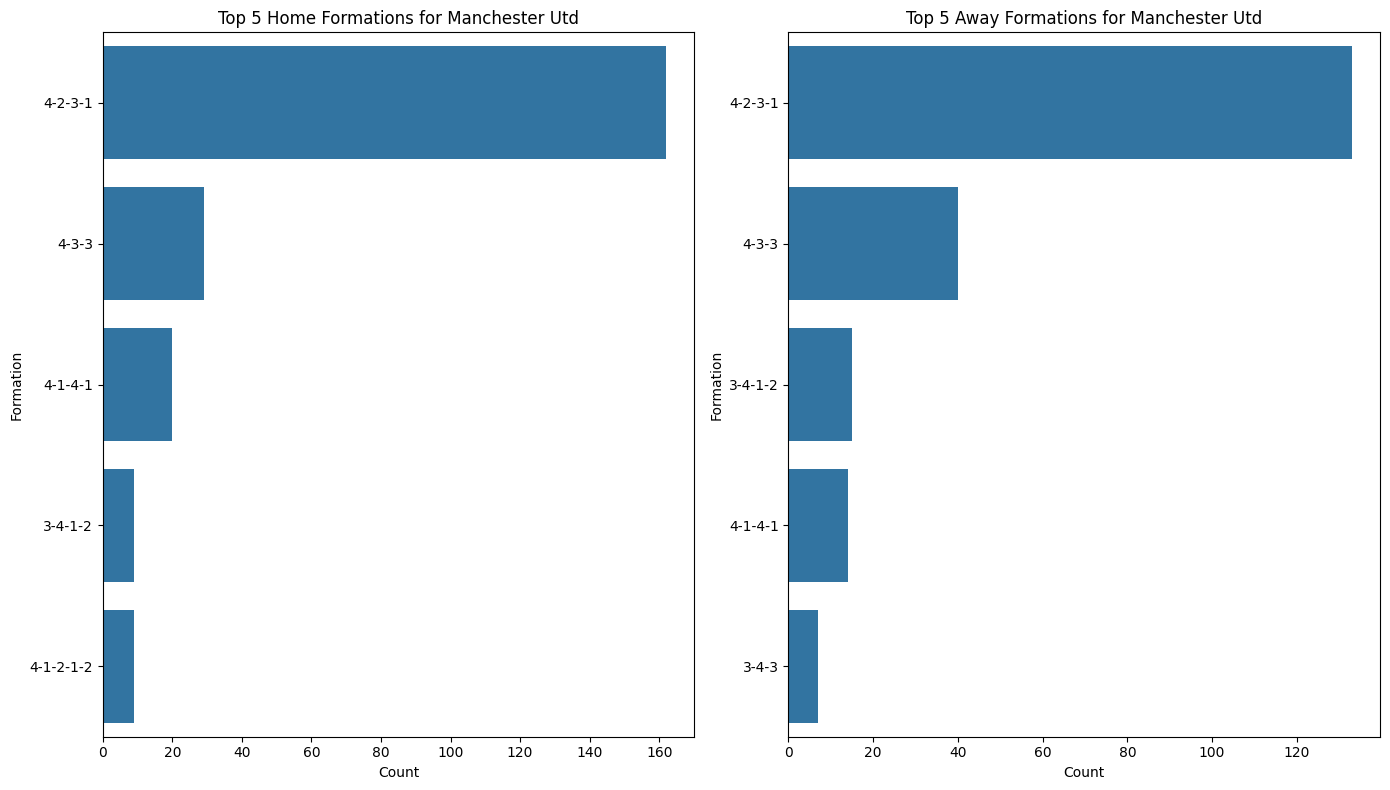

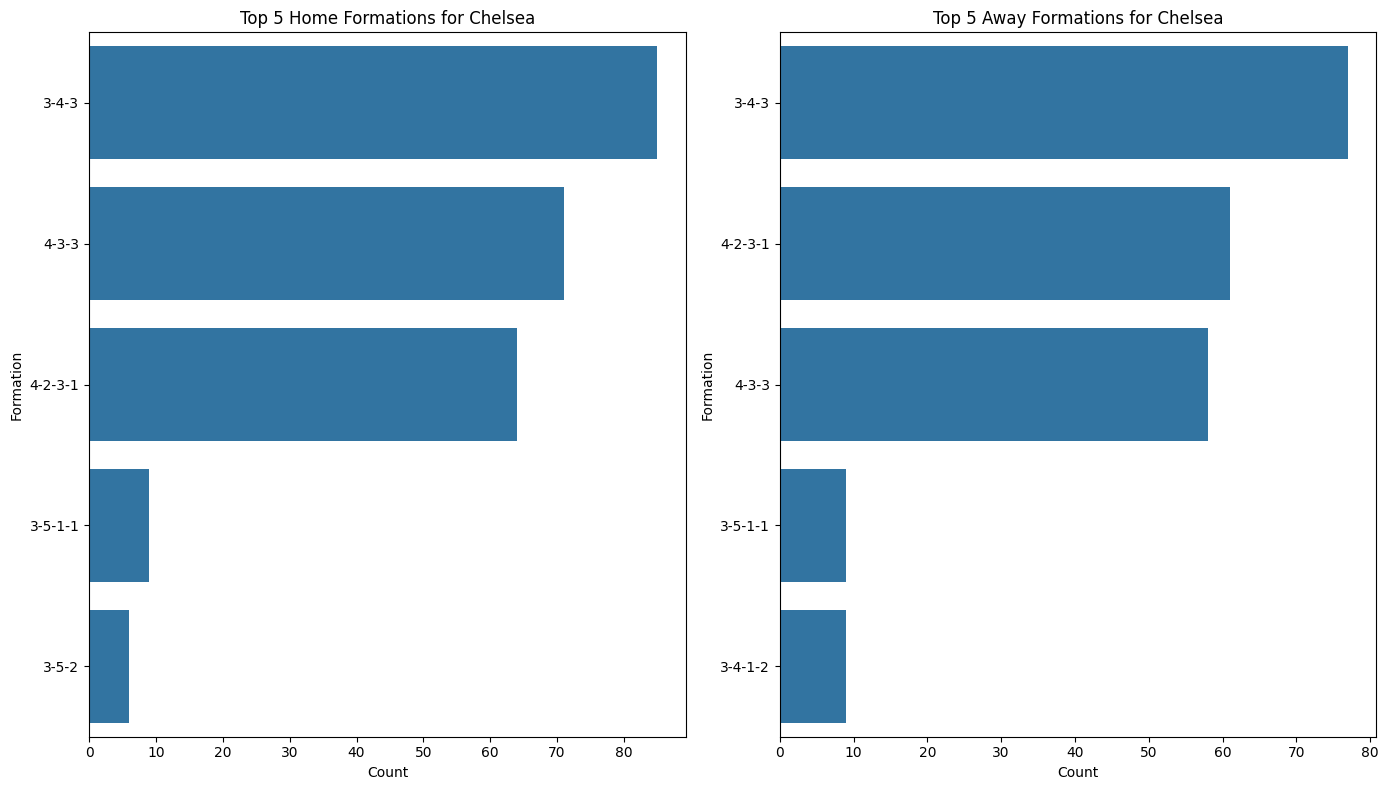

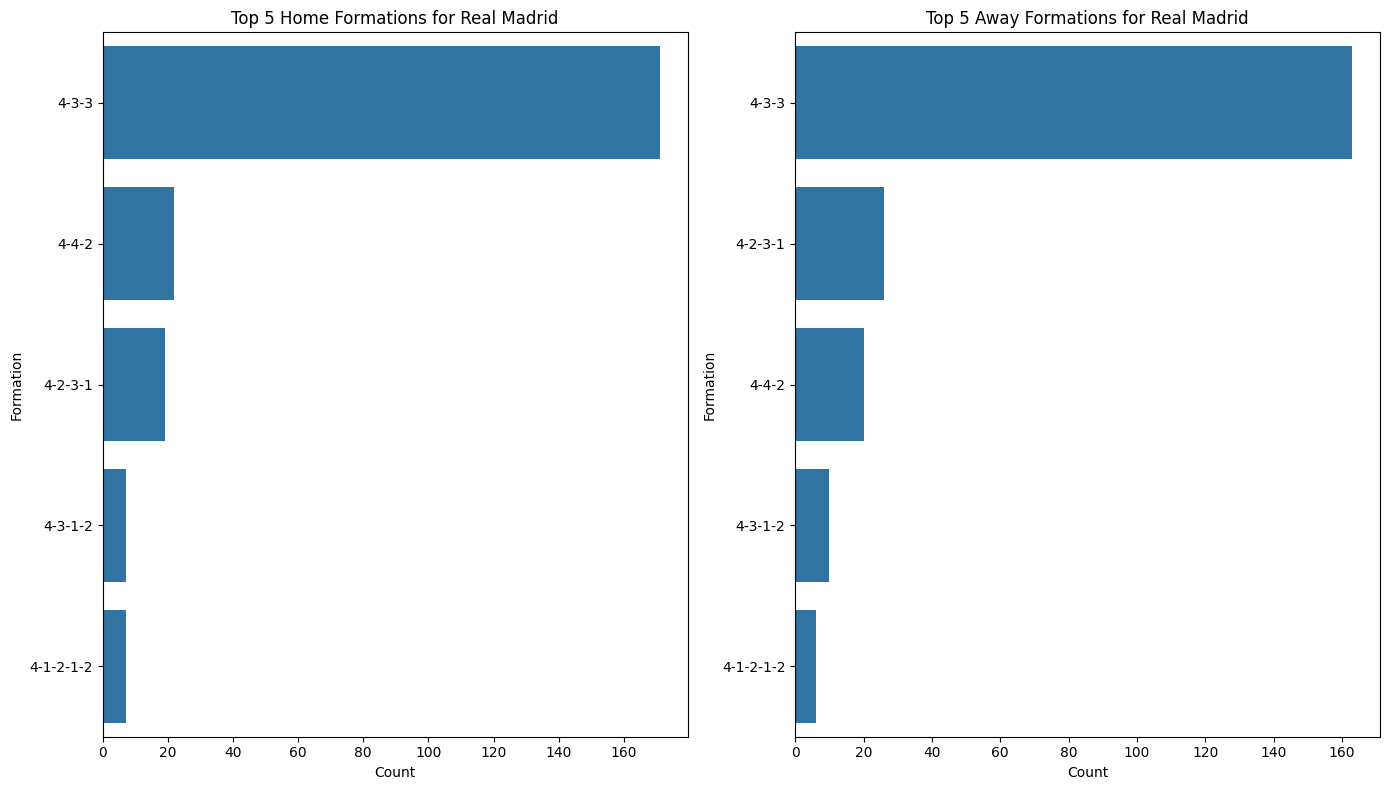

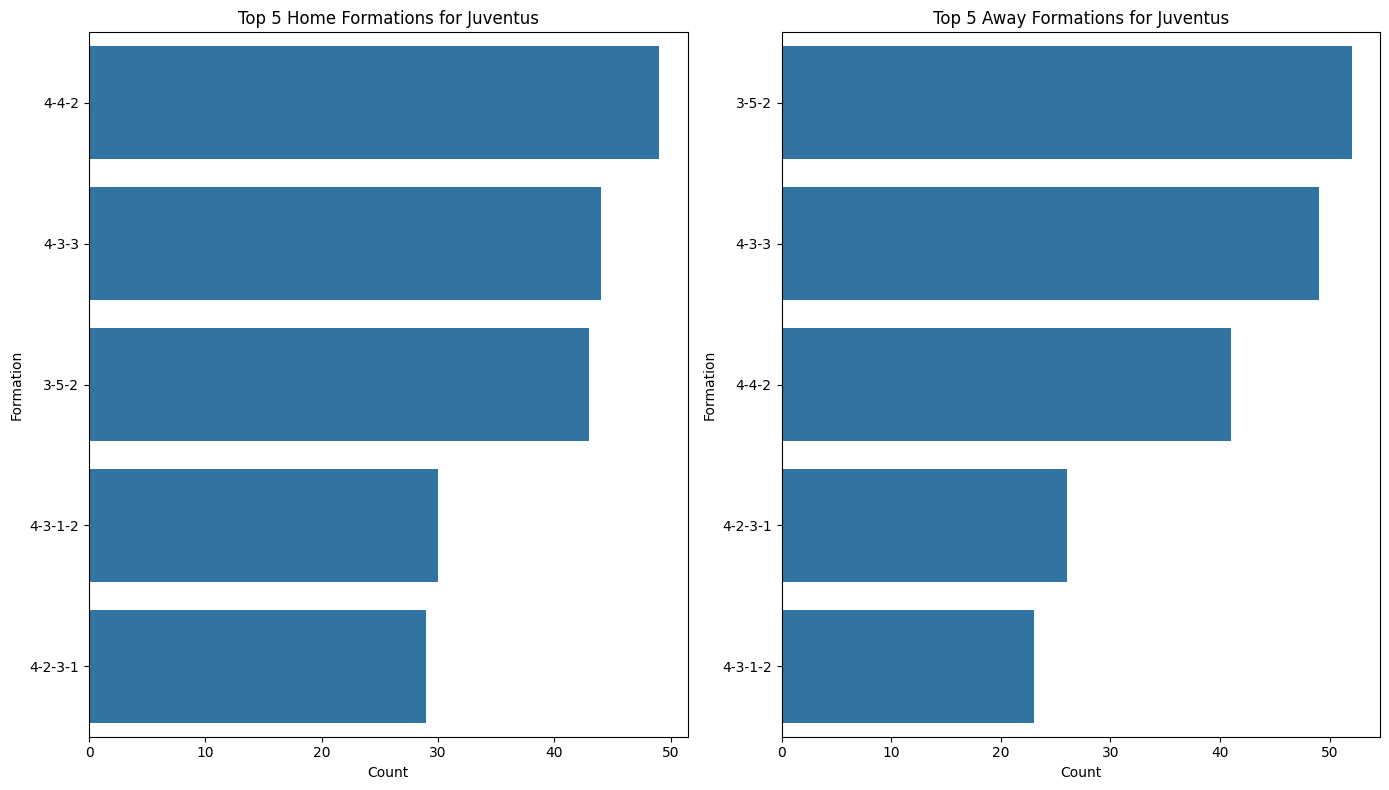

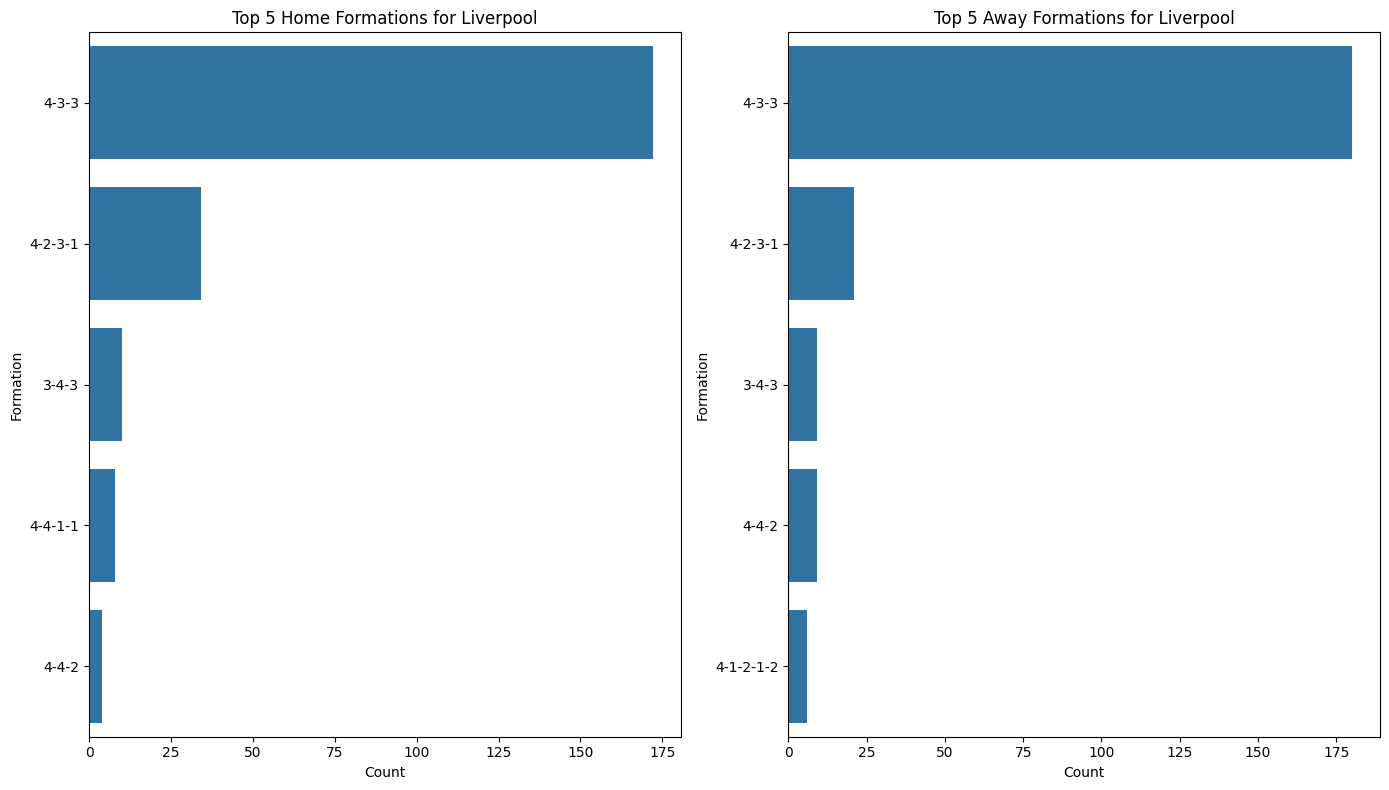

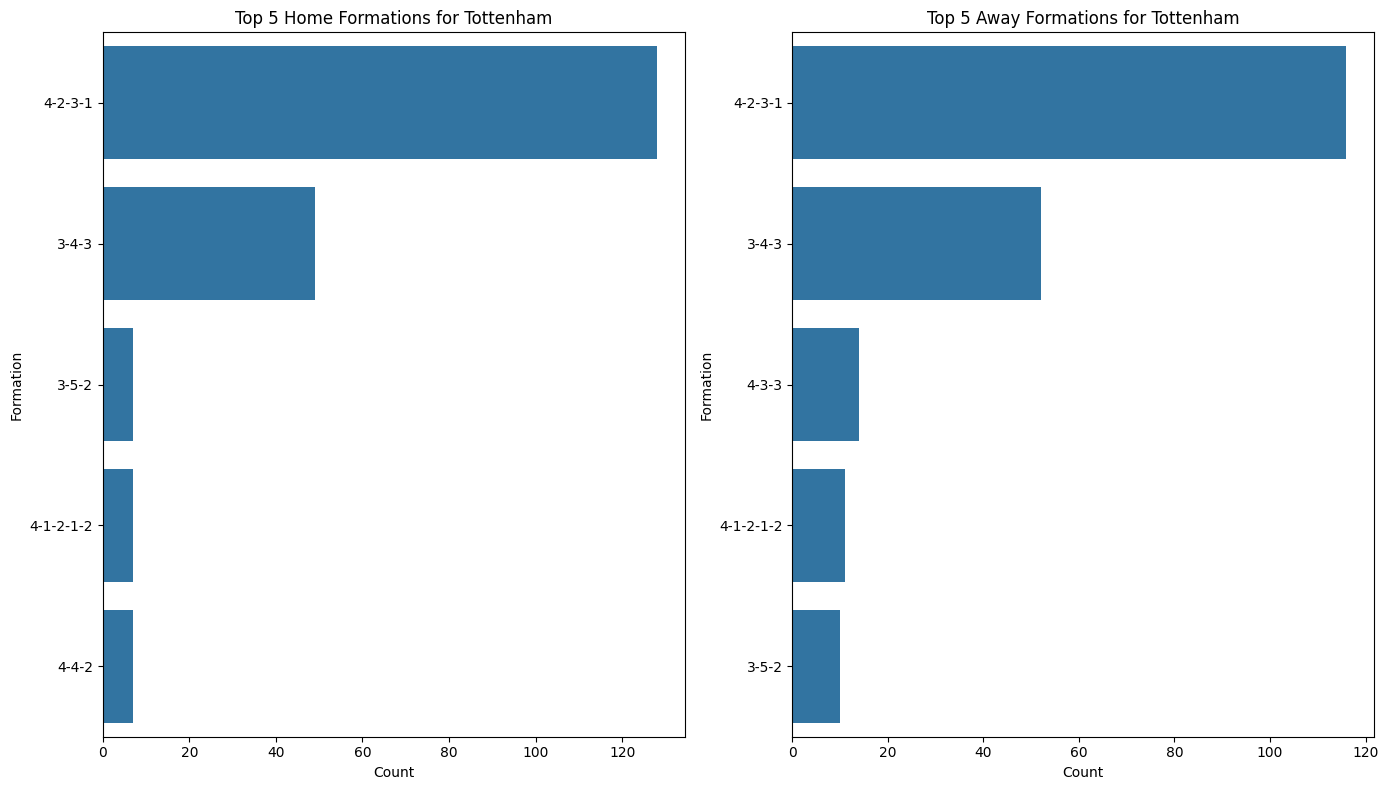

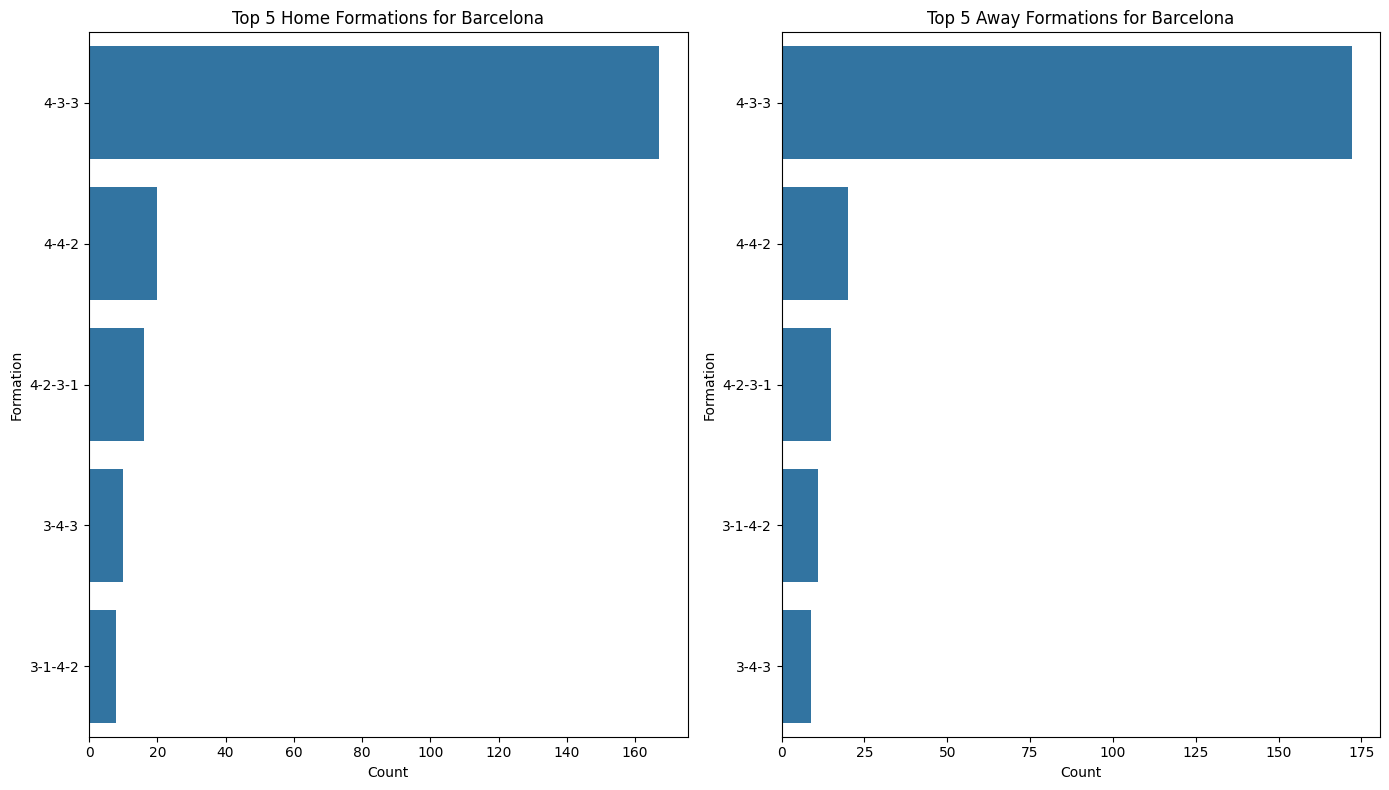

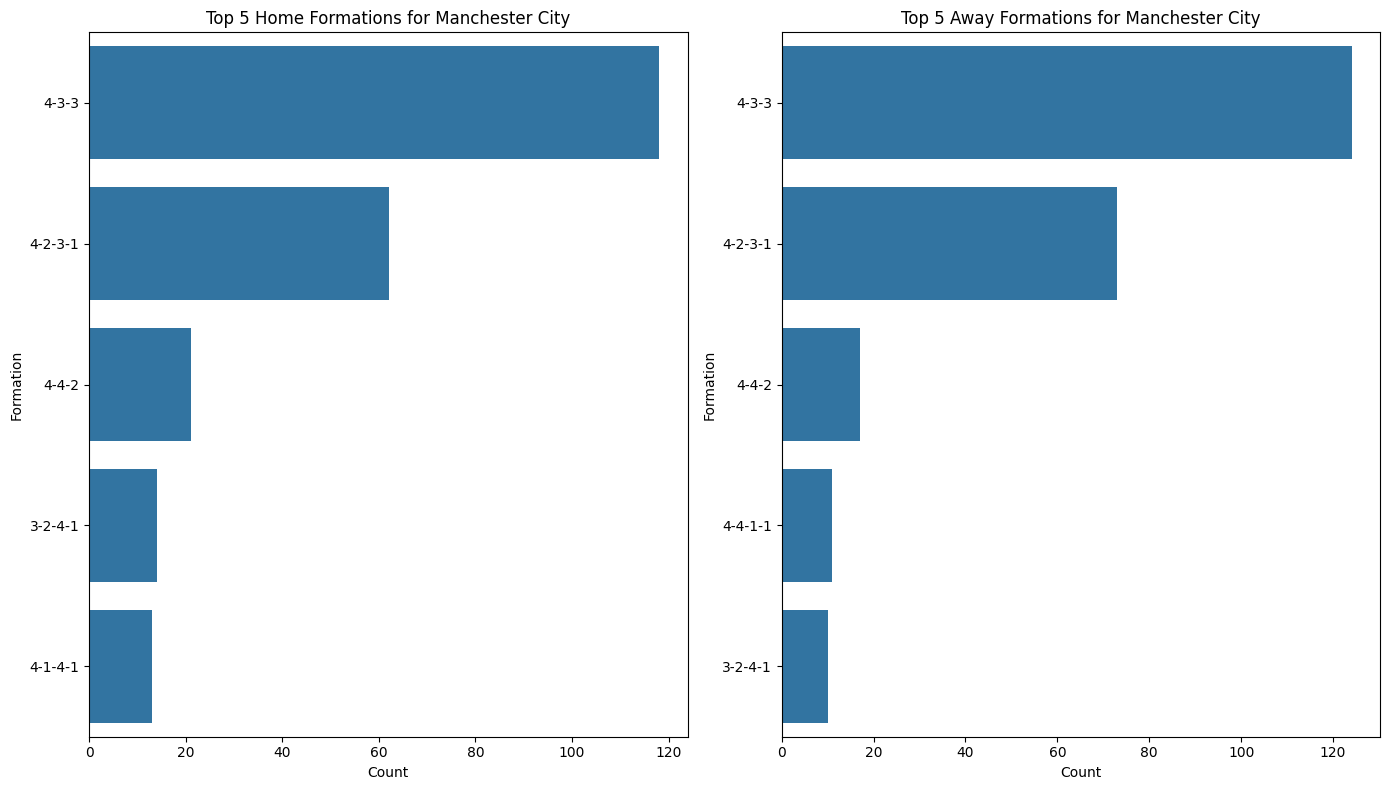

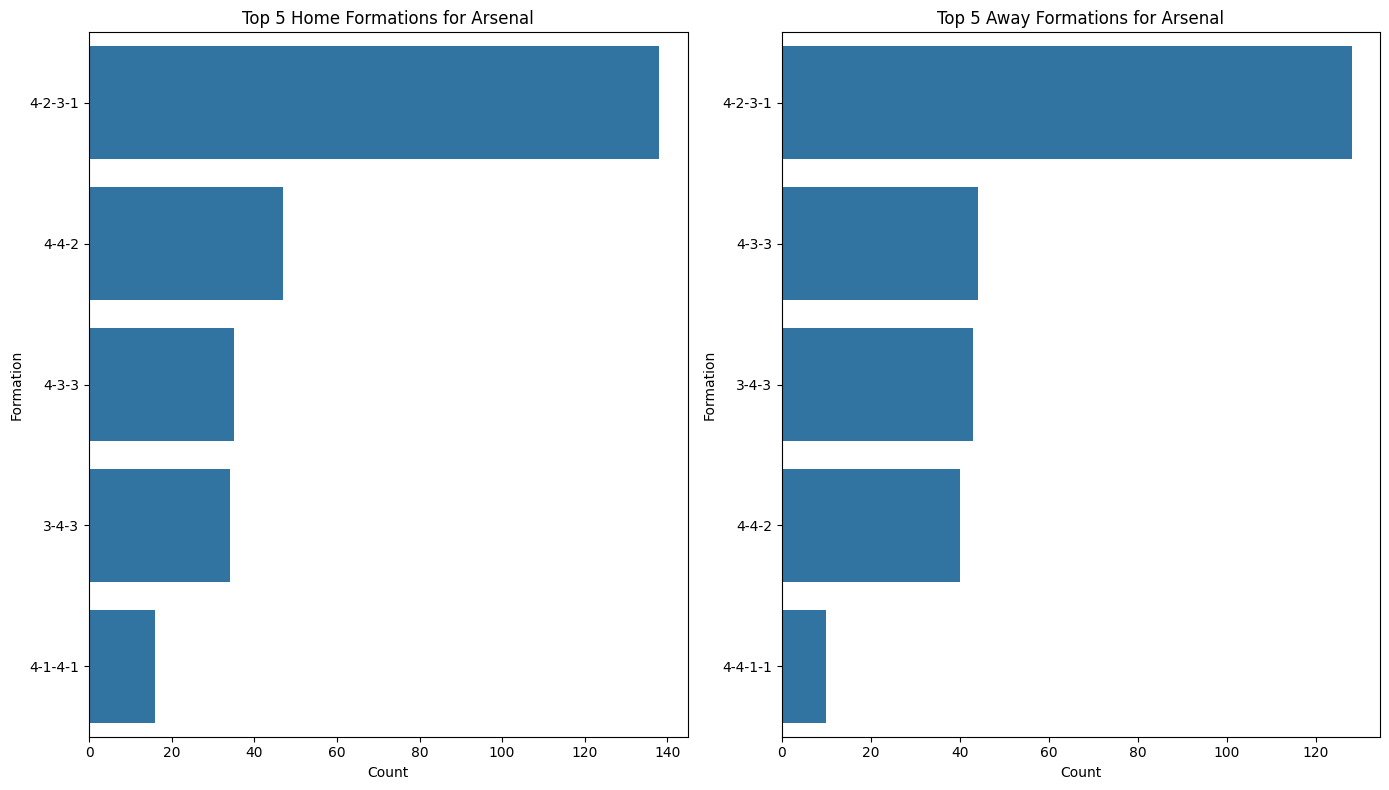

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the top 5 formations for each common team
for team, formations in team_formations.items():
    plt.figure(figsize=(14, 8))

    # Home formations
    plt.subplot(1, 2, 1)
    sns.barplot(x=formations['home_formations'].values, y=formations['home_formations'].index)
    plt.title(f'Top 5 Home Formations for {team}')
    plt.xlabel('Count')
    plt.ylabel('Formation')

    # Away formations
    plt.subplot(1, 2, 2)
    sns.barplot(x=formations['away_formations'].values, y=formations['away_formations'].index)
    plt.title(f'Top 5 Away Formations for {team}')
    plt.xlabel('Count')
    plt.ylabel('Formation')

    plt.tight_layout()
    plt.show()
